In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

from betavae import BVAE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split

/Users/thomas/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
z_dim = 16
beta = 1

num_epochs = 50
batch_size = 64
gradient_accumulation_steps = 1
lr = 1e-3

updates_per_epoch = 1

In [3]:
rand_state = 420

torch.manual_seed(rand_state)
np.random.seed(rand_state)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
# shapes = pd.read_csv('shapes.csv')
# shapes.head()

In [6]:
resize = transforms.Resize(64)
shapes = resize(torch.load('shapes.pt').permute(0, 3, 1, 2) / 255)
del resize
shapes.shape

torch.Size([20000, 3, 64, 64])

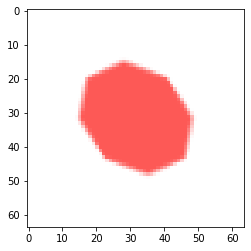

In [7]:
plt.imshow(shapes[0].permute(1, 2, 0).cpu())

In [8]:
train, valid = train_test_split(shapes, test_size=0.1, random_state=rand_state)
del shapes

In [9]:
bce_loss = nn.BCELoss(reduction='sum')
def vae_loss(x, mu, var, recon, beta):
    recon_loss = bce_loss(recon, x)
    kl = -torch.sum(1 + var - torch.pow(mu, 2) - torch.exp(var)) / 2
    return (recon_loss + beta * kl) / x.size(0)

Epoch 1: 100%|█████████▉| 281/282 [00:54<00:00,  5.14it/s]

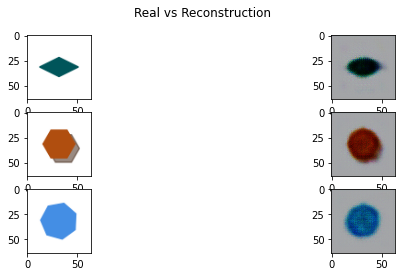

Epoch 1 | train loss 6887.48 | valid loss 6033.86: 100%|██████████| 282/282 [00:57<00:00,  4.92it/s]
Epoch 2: 100%|█████████▉| 281/282 [00:59<00:00,  4.47it/s]

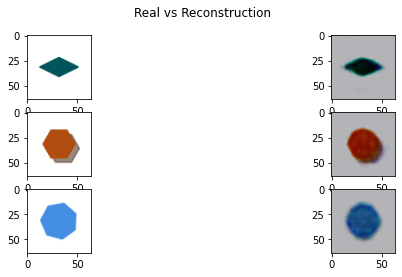

Epoch 2 | train loss 5446.50 | valid loss 4871.77: 100%|██████████| 282/282 [01:01<00:00,  4.55it/s]
Epoch 3: 100%|█████████▉| 281/282 [01:03<00:00,  4.30it/s]

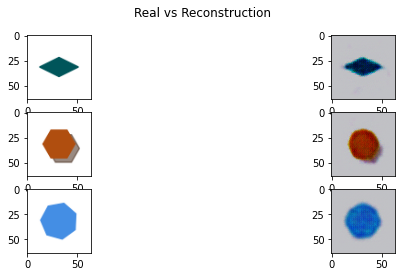

Epoch 3 | train loss 4515.49 | valid loss 4038.47: 100%|██████████| 282/282 [01:05<00:00,  4.28it/s]
Epoch 4: 100%|█████████▉| 281/282 [01:04<00:00,  4.42it/s]

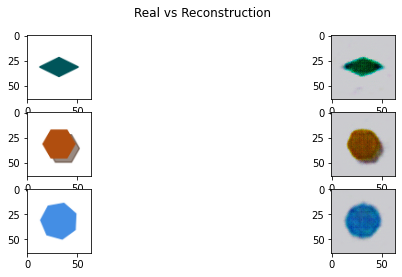

Epoch 4 | train loss 3822.35 | valid loss 3541.71: 100%|██████████| 282/282 [01:06<00:00,  4.21it/s]
Epoch 5: 100%|█████████▉| 281/282 [01:18<00:00,  4.19it/s]

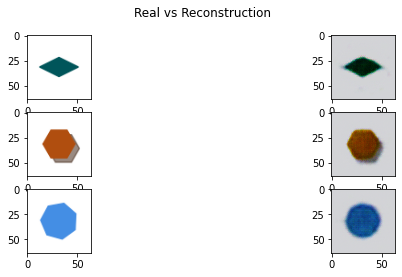

Epoch 5 | train loss 3295.53 | valid loss 3142.35: 100%|██████████| 282/282 [01:21<00:00,  3.44it/s]
Epoch 6: 100%|█████████▉| 281/282 [01:37<00:00,  2.38it/s]

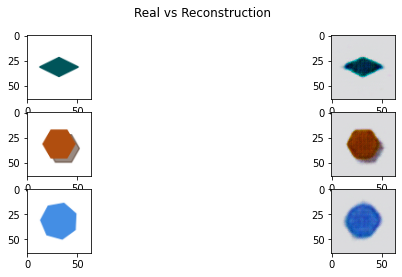

Epoch 6 | train loss 2887.37 | valid loss 2679.92: 100%|██████████| 282/282 [01:42<00:00,  2.74it/s]
Epoch 7: 100%|█████████▉| 281/282 [02:10<00:00,  1.27it/s]

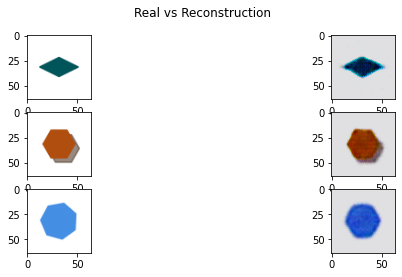

Epoch 7 | train loss 2571.92 | valid loss 2466.89: 100%|██████████| 282/282 [02:19<00:00,  2.02it/s]
Epoch 8: 100%|█████████▉| 281/282 [02:12<00:00,  2.34it/s]

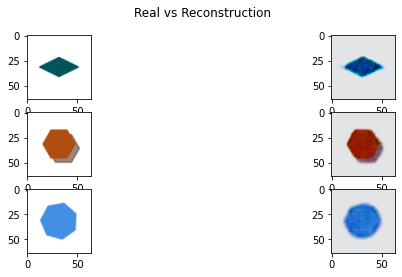

Epoch 8 | train loss 2320.12 | valid loss 2231.45: 100%|██████████| 282/282 [02:17<00:00,  2.05it/s]
Epoch 9: 100%|█████████▉| 281/282 [02:05<00:00,  2.13it/s]

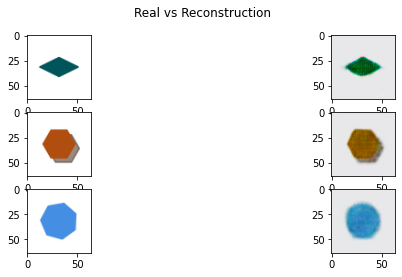

Epoch 9 | train loss 2122.83 | valid loss 2016.32: 100%|██████████| 282/282 [02:11<00:00,  2.14it/s]
Epoch 10: 100%|█████████▉| 281/282 [02:08<00:00,  2.26it/s]

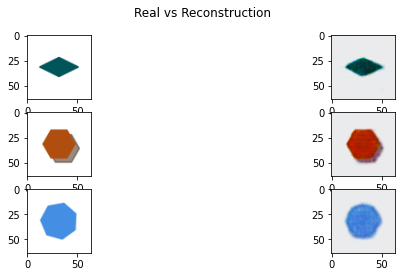

Epoch 10 | train loss 1952.36 | valid loss 1873.62: 100%|██████████| 282/282 [02:13<00:00,  2.11it/s]
Epoch 11: 100%|█████████▉| 281/282 [02:09<00:00,  2.27it/s]

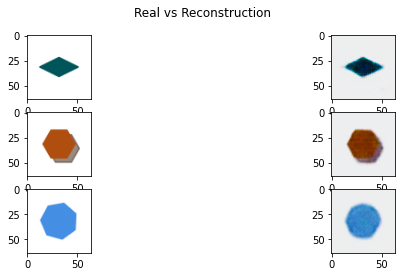

Epoch 11 | train loss 1820.39 | valid loss 1722.54: 100%|██████████| 282/282 [02:15<00:00,  2.09it/s]
Epoch 12: 100%|█████████▉| 281/282 [02:18<00:00,  1.31it/s]

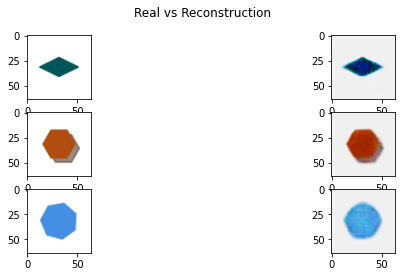

Epoch 12 | train loss 1702.37 | valid loss 1635.17: 100%|██████████| 282/282 [02:28<00:00,  1.89it/s]
Epoch 13: 100%|█████████▉| 281/282 [03:40<00:00,  3.52it/s]

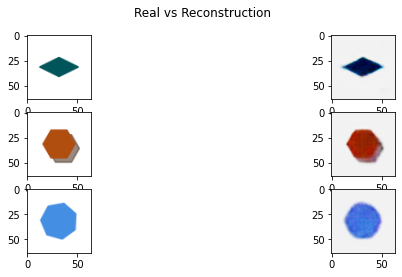

Epoch 13 | train loss 1615.31 | valid loss 1627.45: 100%|██████████| 282/282 [03:43<00:00,  1.26it/s]
Epoch 14: 100%|█████████▉| 281/282 [01:05<00:00,  4.32it/s]

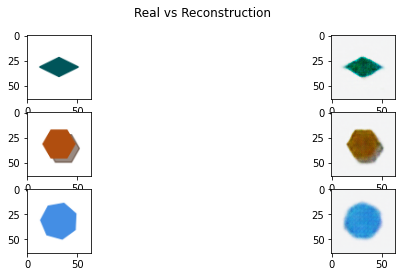

Epoch 14 | train loss 1553.40 | valid loss 1500.91: 100%|██████████| 282/282 [01:08<00:00,  4.12it/s]
Epoch 15: 100%|█████████▉| 281/282 [01:03<00:00,  4.45it/s]

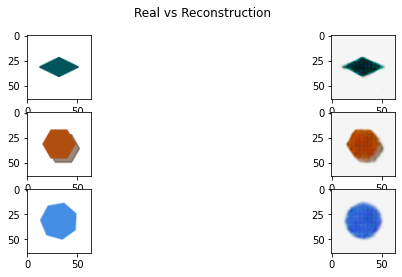

Epoch 15 | train loss 1461.00 | valid loss 1419.96: 100%|██████████| 282/282 [01:06<00:00,  4.24it/s]
Epoch 16: 100%|█████████▉| 281/282 [01:03<00:00,  4.50it/s]

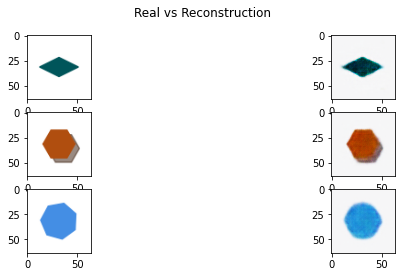

Epoch 16 | train loss 1407.20 | valid loss 1363.65: 100%|██████████| 282/282 [01:06<00:00,  4.27it/s]
Epoch 17: 100%|█████████▉| 281/282 [01:03<00:00,  4.46it/s]

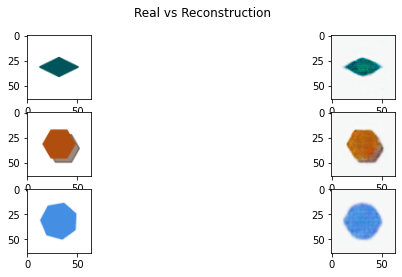

Epoch 17 | train loss 1361.15 | valid loss 1300.83: 100%|██████████| 282/282 [01:06<00:00,  4.26it/s]
Epoch 18: 100%|█████████▉| 281/282 [01:03<00:00,  4.41it/s]

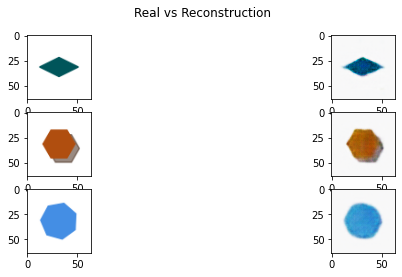

Epoch 18 | train loss 1311.96 | valid loss 1263.80: 100%|██████████| 282/282 [01:05<00:00,  4.28it/s]
Epoch 19: 100%|█████████▉| 281/282 [01:03<00:00,  4.43it/s]

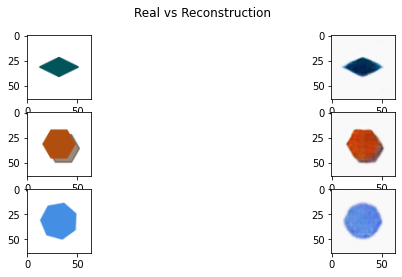

Epoch 19 | train loss 1283.21 | valid loss 1221.83: 100%|██████████| 282/282 [01:05<00:00,  4.28it/s]
Epoch 20: 100%|█████████▉| 281/282 [01:03<00:00,  4.49it/s]

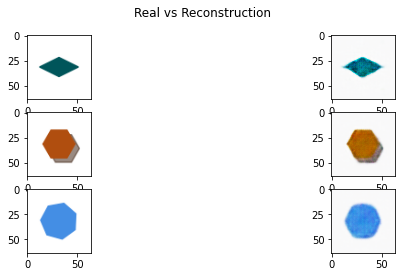

Epoch 20 | train loss 1236.57 | valid loss 1226.72: 100%|██████████| 282/282 [01:05<00:00,  4.29it/s]
Epoch 21: 100%|█████████▉| 281/282 [01:03<00:00,  4.48it/s]

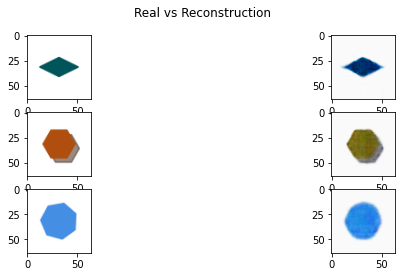

Epoch 21 | train loss 1209.93 | valid loss 1213.04: 100%|██████████| 282/282 [01:06<00:00,  4.27it/s]
Epoch 22: 100%|█████████▉| 281/282 [01:03<00:00,  4.47it/s]

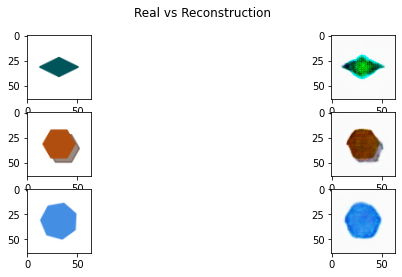

Epoch 22 | train loss 1204.77 | valid loss 1737.37: 100%|██████████| 282/282 [01:06<00:00,  4.26it/s]
Epoch 23: 100%|█████████▉| 281/282 [01:02<00:00,  4.47it/s]

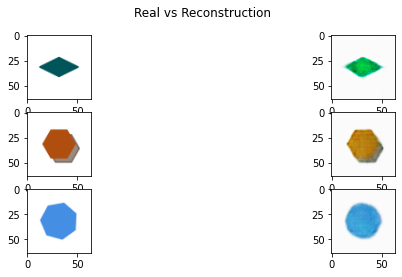

Epoch 23 | train loss 1171.85 | valid loss 1144.03: 100%|██████████| 282/282 [01:05<00:00,  4.33it/s]
Epoch 24: 100%|█████████▉| 281/282 [01:02<00:00,  4.53it/s]

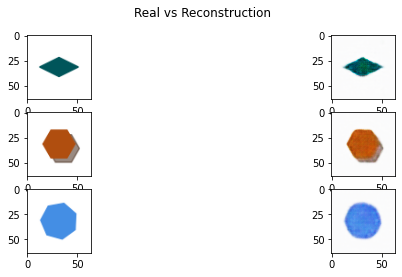

Epoch 24 | train loss 1141.77 | valid loss 1113.35: 100%|██████████| 282/282 [01:04<00:00,  4.35it/s]
Epoch 25: 100%|█████████▉| 281/282 [01:03<00:00,  4.55it/s]

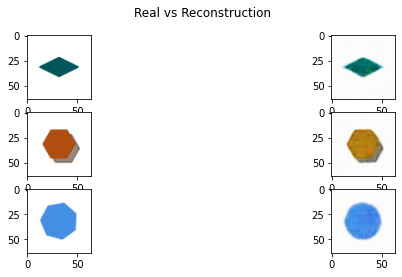

Epoch 25 | train loss 1123.50 | valid loss 1083.62: 100%|██████████| 282/282 [01:06<00:00,  4.26it/s]
Epoch 26: 100%|█████████▉| 281/282 [01:02<00:00,  4.53it/s]

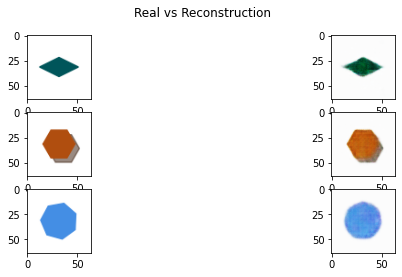

Epoch 26 | train loss 1103.53 | valid loss 1083.34: 100%|██████████| 282/282 [01:05<00:00,  4.30it/s]
Epoch 27: 100%|█████████▉| 281/282 [01:03<00:00,  4.50it/s]

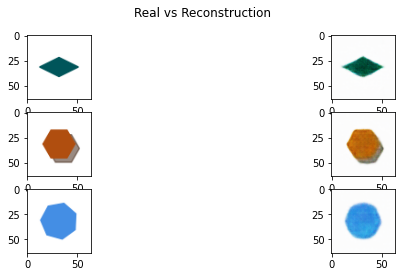

Epoch 27 | train loss 1089.47 | valid loss 1060.34: 100%|██████████| 282/282 [01:05<00:00,  4.29it/s]
Epoch 28: 100%|█████████▉| 281/282 [01:03<00:00,  4.44it/s]

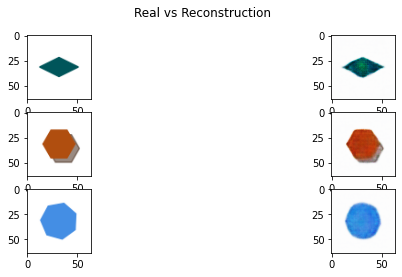

Epoch 28 | train loss 1073.46 | valid loss 1131.99: 100%|██████████| 282/282 [01:06<00:00,  4.25it/s]
Epoch 29: 100%|█████████▉| 281/282 [01:03<00:00,  4.43it/s]

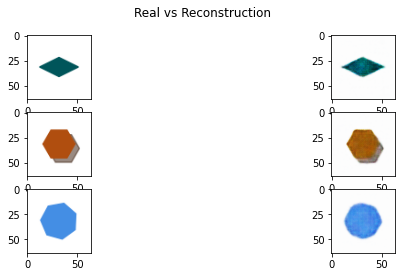

Epoch 29 | train loss 1069.05 | valid loss 1041.25: 100%|██████████| 282/282 [01:06<00:00,  4.24it/s]
Epoch 30:  63%|██████▎   | 179/282 [00:41<00:24,  4.20it/s]

In [ ]:
net = BVAE(z_dim)
net = net.to(device)
optimizer = torch.optim.AdamW(net.parameters(), lr=lr)

train_dataloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

num_batches = len(train_dataloader)
num_valid_batches = len(valid_dataloader)


train_losses, valid_losses = [], []

update_idxs = set([i * (num_batches // updates_per_epoch)
    for i in range(1, updates_per_epoch)] + [num_batches])

best_valid = 1e9
for epoch in range(1, 1+num_epochs):
    total_loss = 0.0 

    pbar = tqdm(train_dataloader, desc=f"Epoch {epoch}", leave=True, total=num_batches)
    optimizer.zero_grad()
    for idx, x in enumerate(pbar, start=1):
        x = x.to(device)
        
        recon, mu, var, _ = net(x)
        
        loss = vae_loss(x, mu, var, recon, beta)

        total_loss += loss.item() / gradient_accumulation_steps
        loss = loss / gradient_accumulation_steps
        loss.backward()
        
        if (idx % gradient_accumulation_steps == 0) or (idx == num_batches):
            optimizer.step()
            optimizer.zero_grad()

        if idx in update_idxs:
            avg_valid_loss = 0.0
            
            displays = []
            net.eval()
            with torch.no_grad():
                for x in valid_dataloader:
                    recon, mu, var, z = net(x)
                    loss = vae_loss(x, mu, var, recon, beta)
                    avg_valid_loss += loss.item() / num_valid_batches
                    if not displays:
                        net.random_z = tuple(z[0].detach().cpu().numpy())
                        displays = [
                            (x[0].permute(1, 2, 0).cpu().numpy(), recon[0].permute(1, 2, 0).cpu().numpy()), 
                            (x[1].permute(1, 2, 0).cpu().numpy(), recon[1].permute(1, 2, 0).cpu().numpy()),
                            (x[2].permute(1, 2, 0).cpu().numpy(), recon[2].permute(1, 2, 0).cpu().numpy())
                        ]
                
                if avg_valid_loss < best_valid:
                    torch.save(net, f'models/{beta}-bvae-{z_dim}dim')
                    best_valid = avg_valid_loss
                    
                valid_losses.append(avg_valid_loss)
                
                if idx == num_batches:
                    fig, axes = plt.subplots(3, 2)
                    fig.suptitle('Real vs Reconstruction')
                    fig.set_size_inches(10, 4)
                    for (ax1, ax2), (im1, im2) in zip(axes, displays):
                        ax1.imshow(im1)
                        ax2.imshow(im2)
                    plt.show()
            net.train()


            pbar.set_description(f"Epoch {epoch} | train loss {total_loss / idx:.2f}" + \
                                f" | valid loss {avg_valid_loss:.2f}")
            train_losses.append(total_loss / idx) 

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.legend()
plt.show()